In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

city_df = pd.read_csv ('tampa.csv')
read_dis_df = pd.read_csv ('disasters.csv')

/tmp/ipykernel_185034/3300721004.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Declaration Date'] = pd.to_datetime(filtered_df['Declaration Date'].copy())
/tmp/ipykernel_185034/3300721004.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter_df.loc[:, 'offset'] = (curr_date - filter_df['date'])
/tmp/ipykernel_185034/3300721004.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



['HURRICANE SALLY' 'HURRICANE NATE' 'HURRICANE IRMA' 'HURRICANE GUSTAV'
 'HURRICANE KATRINA' 'HURRICANE DENNIS' 'HURRICANE IVAN' 'HURRICANE LAURA'
 'HURRICANE IDALIA' 'HURRICANE NICOLE' 'HURRICANE IAN' 'HURRICANE DORIAN'
 'HURRICANE MICHAEL' 'HURRICANE HERMINE' 'HURRICANE FRANCES'
 'HURRICANE CHARLEY' 'HURRICANE ETA' 'HURRICANE JEANNE' 'HURRICANE ISAIAS'
 'HURRICANE MATTHEW' 'HURRICANE WILMA' 'HURRICANE IDA' 'HURRICANE DELTA'
 'HURRICANE MARCO' 'HURRICANE ISAAC' 'HURRICANE SANDY' 'HURRICANE IRENE'
 'HURRICANE HARVEY' 'HURRICANE IKE' 'HURRICANE RITA' 'HURRICANE ISABEL']


/tmp/ipykernel_185034/3300721004.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter_df.loc[:, 'offset'] = (curr_date - filter_df['date'])
/tmp/ipykernel_185034/3300721004.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter_df.loc[:, 'Offset from Hurricane'] = (scatter_df.copy())['offset'].dt.days
/tmp/ipykernel_185034/3300721004.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

Text(0, 0.5, 'Forclosure Costs')

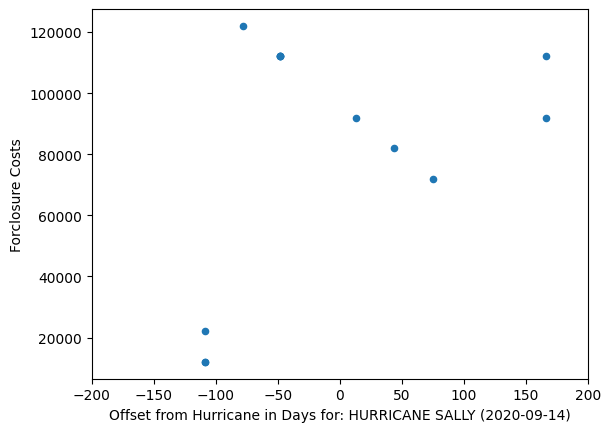

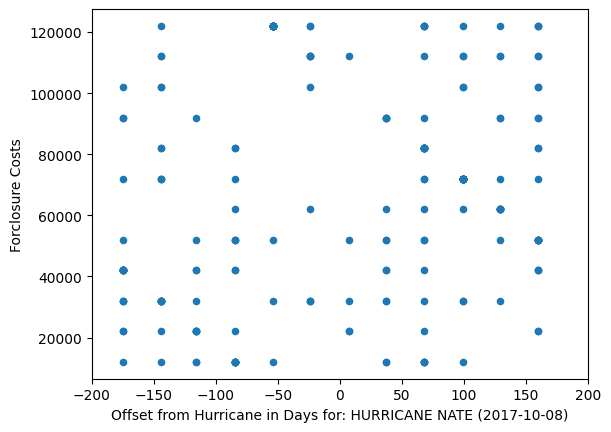

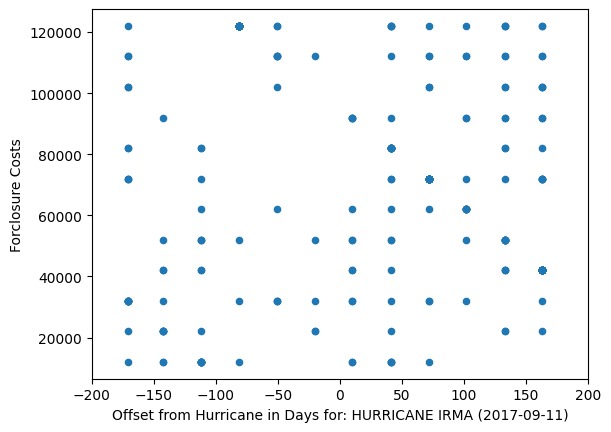

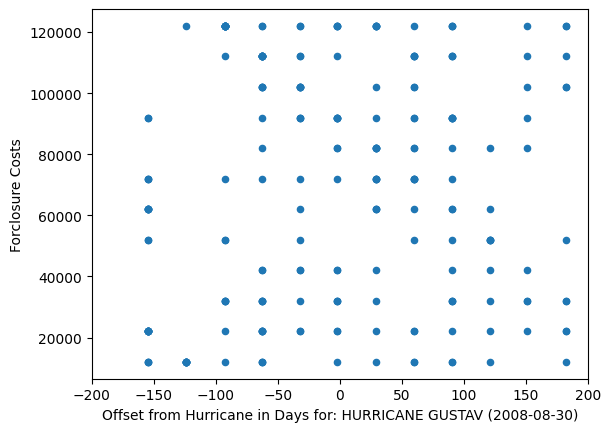

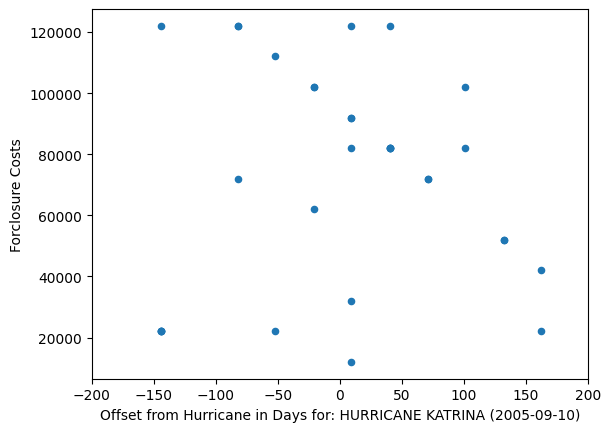

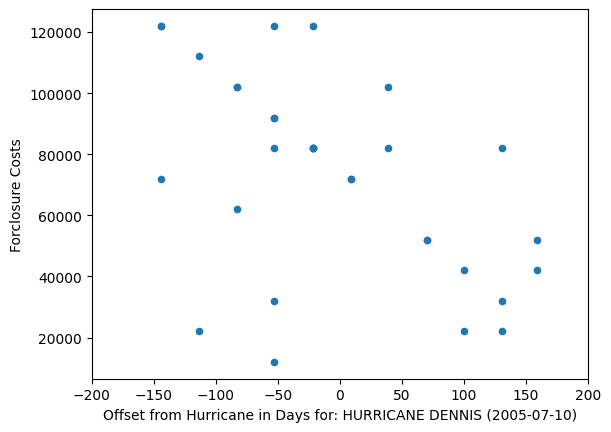

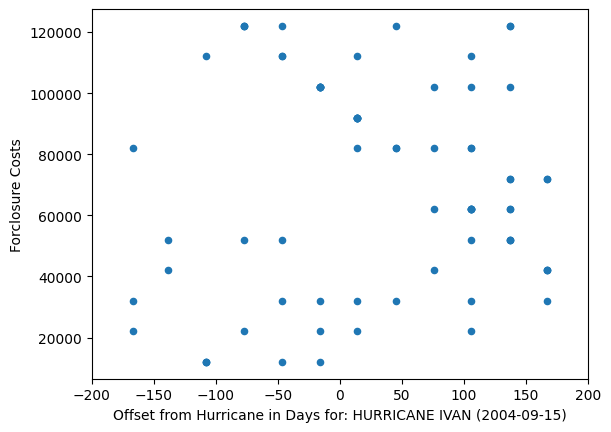

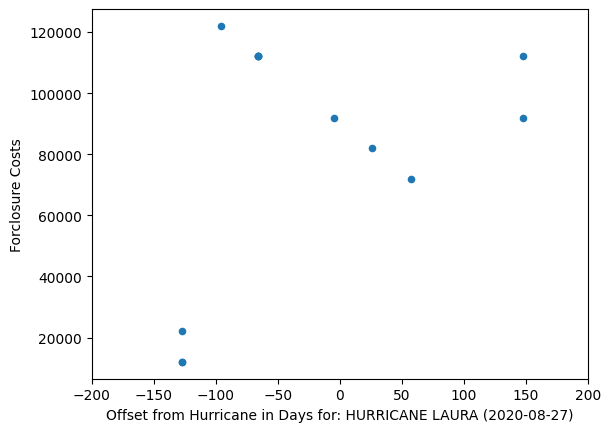

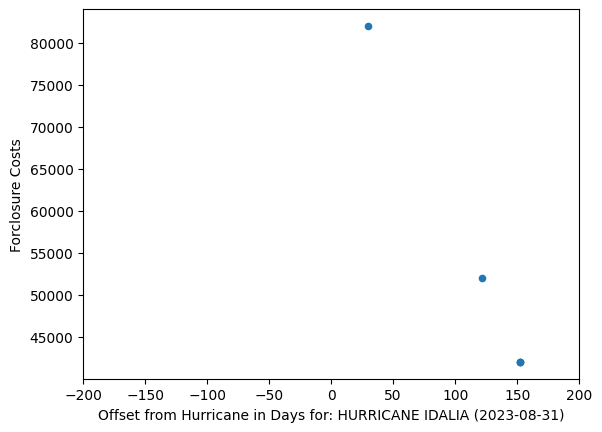

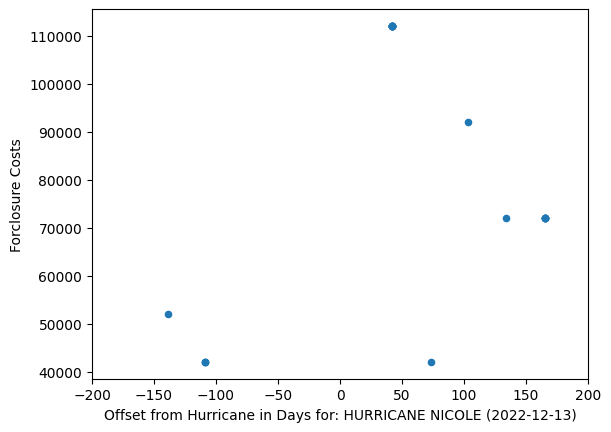

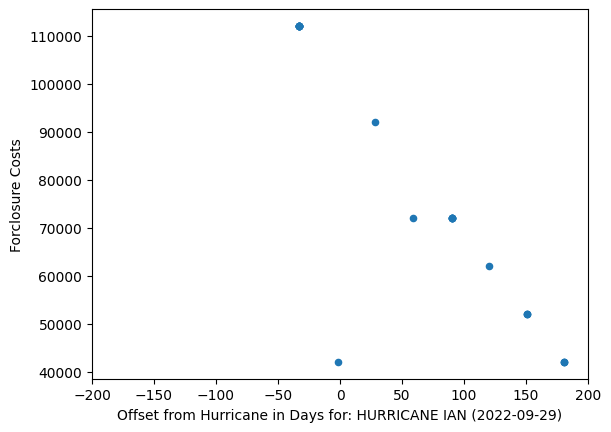

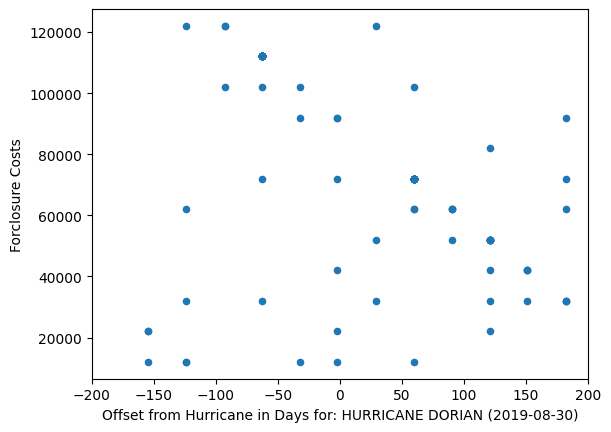

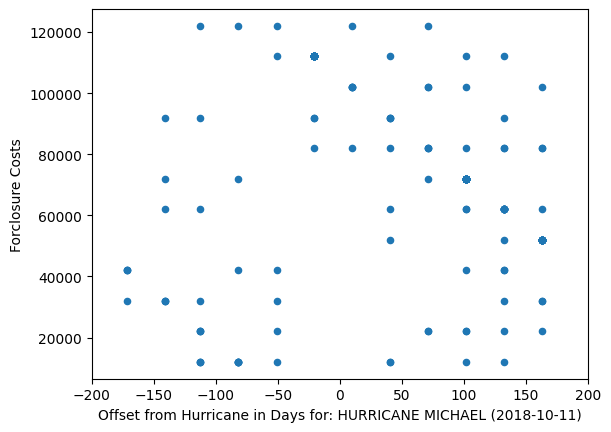

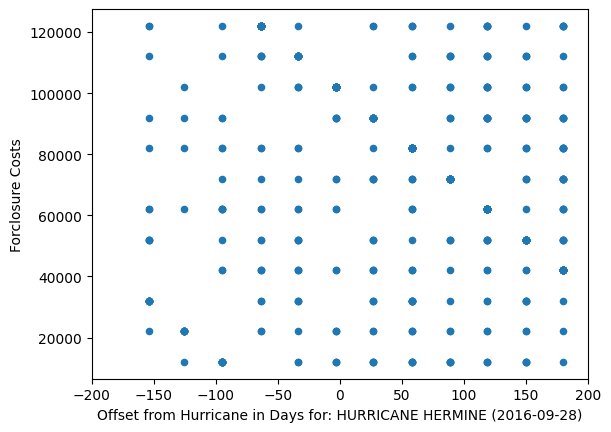

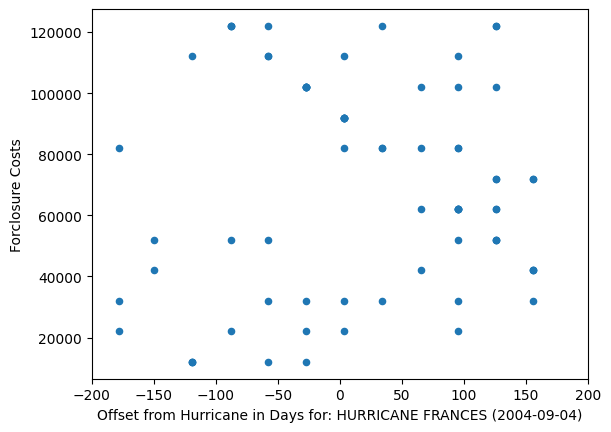

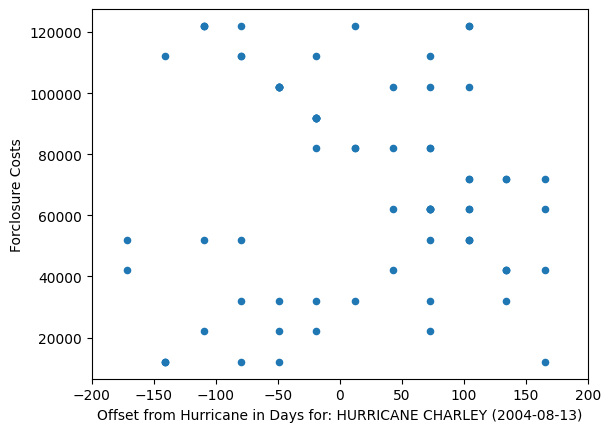

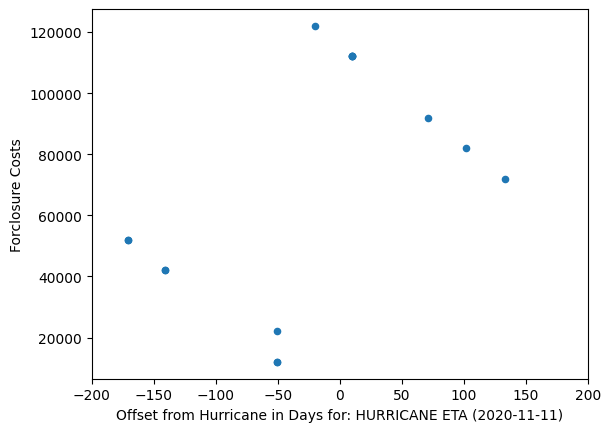

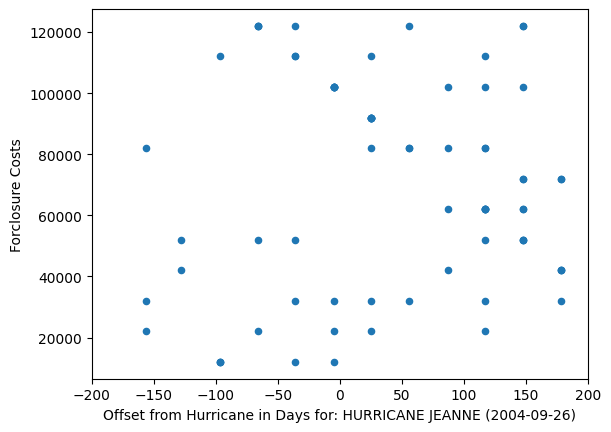

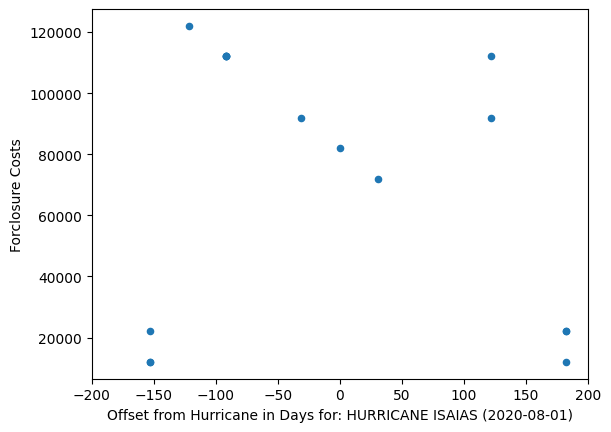

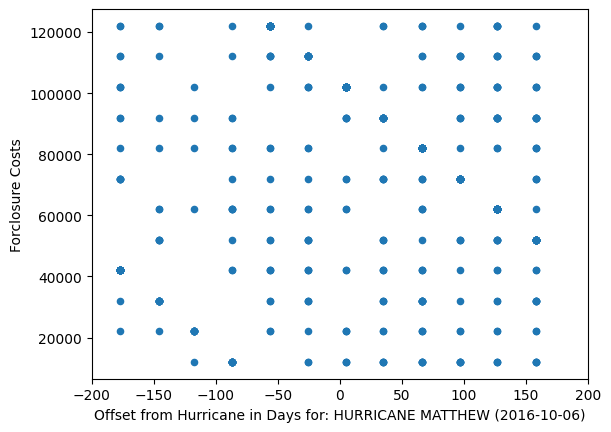

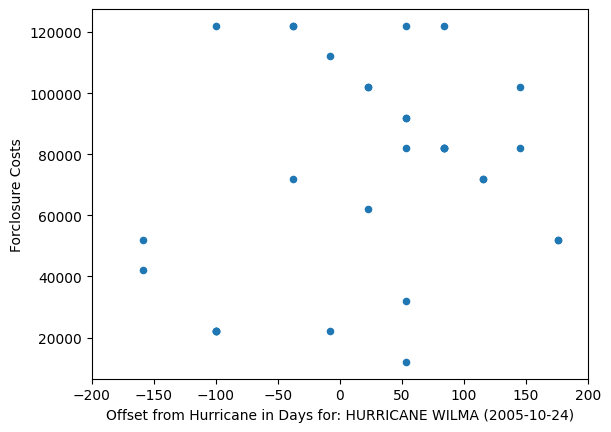

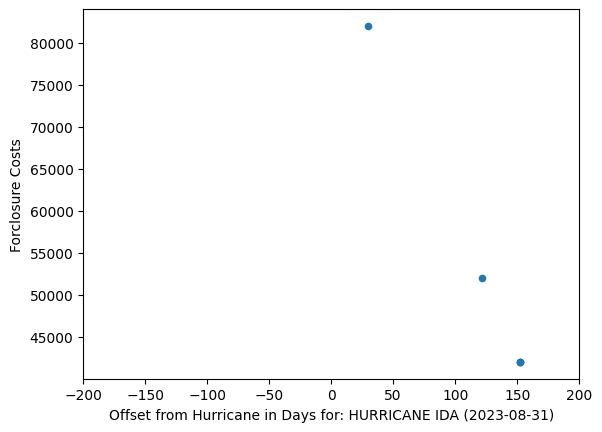

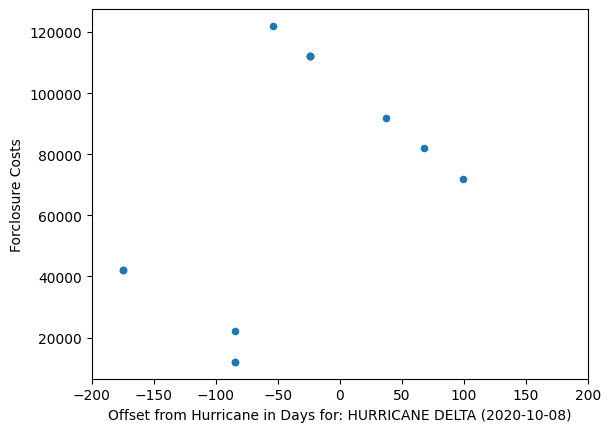

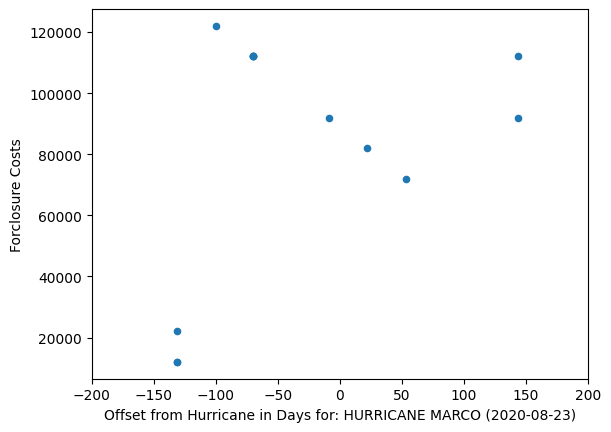

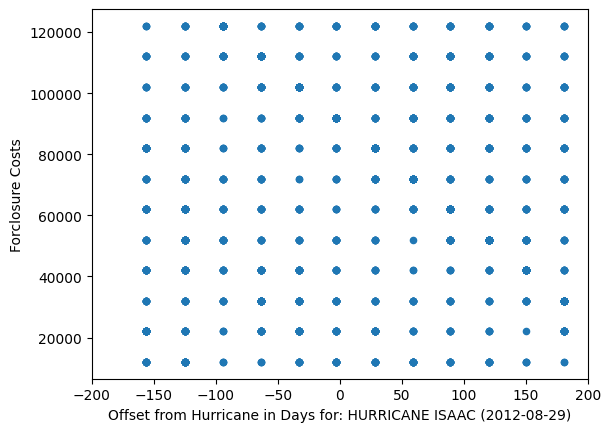

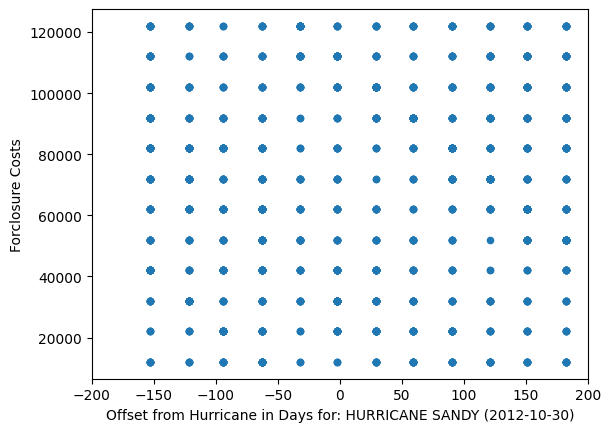

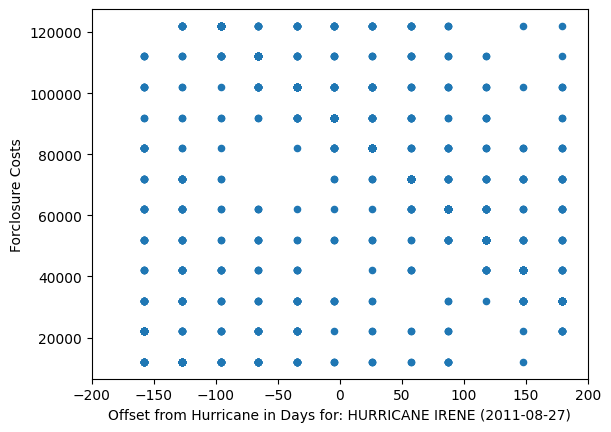

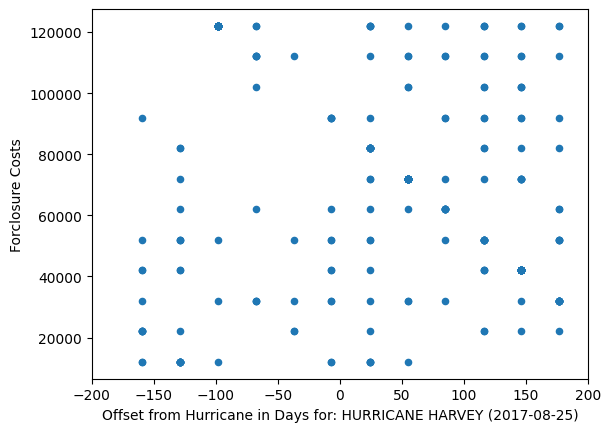

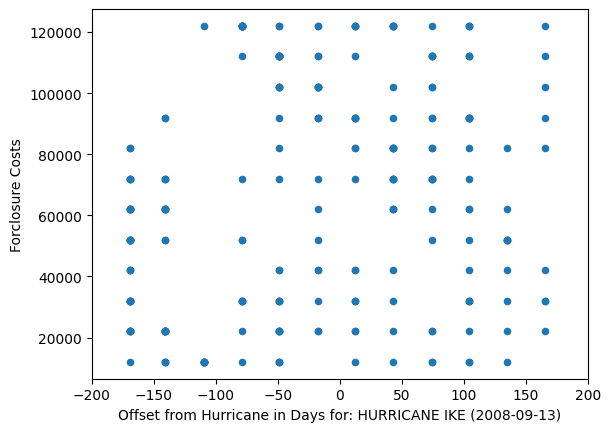

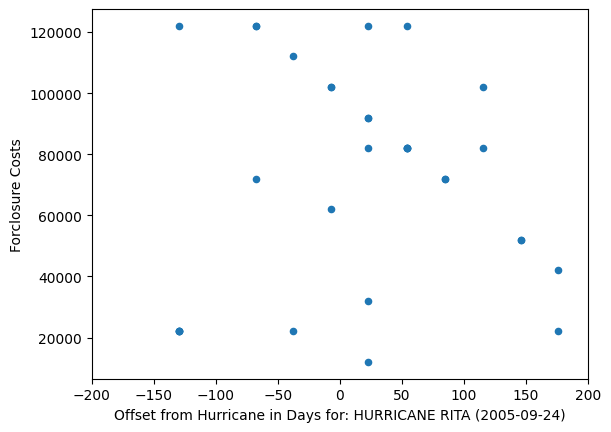

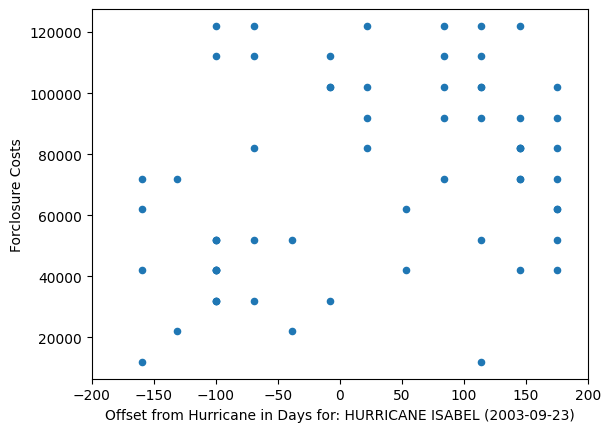

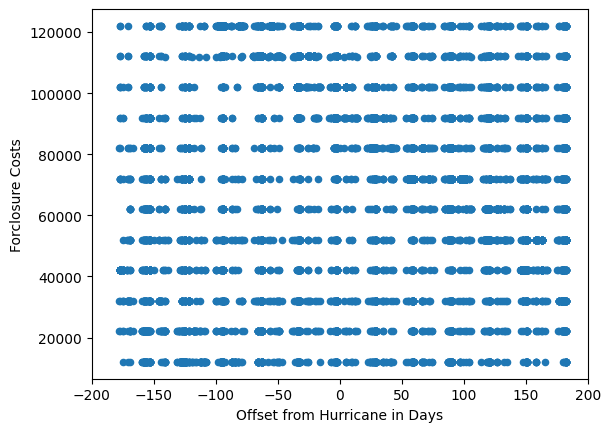

In [71]:
# florida

# filter to match what is in the city
counties = ['Leon County', 'Gadsden County', 'Wakulla County', 'Jefferson County',
                'Hillsborough County', 'Pinellas County',
                'Miami-Dade County']
filtered_df = read_dis_df[read_dis_df['County'].isin(counties)]

# filter it so it doesn't go less than min year in tampa
filtered_df['Declaration Date'] = pd.to_datetime(filtered_df['Declaration Date'].copy())
min_year = city_df['PayYear'].min()
filtered_df = filtered_df[filtered_df['Declaration Date'].dt.year >= min_year]

# get all unique hurricane names
hurricane_names = filtered_df['Declaration Title'].str.extract(r'(HURRICANE\s+\w+)', expand=False).dropna()
hurricane_names = hurricane_names.unique()

disaster_df = pd.DataFrame({'hurricanes': hurricane_names})

# Create a dictionary mapping Hurricane names to Declaration Dates
hurricane_date_mapping = {}

for hurricane_name in disaster_df['hurricanes']:
    # Find matching Declaration Titles (considering variations)
    matching_titles = filtered_df[filtered_df['Declaration Title'].str.contains(hurricane_name, case=False)]['Declaration Title']
    if not matching_titles.empty:
        # Use the first matching Declaration Date
        hurricane_date_mapping[hurricane_name] = filtered_df.loc[filtered_df['Declaration Title'] == matching_titles.iloc[0], 'Declaration Date'].values[0]

# add in declaration date to new df
disaster_df['date'] = pd.to_datetime(disaster_df['hurricanes'].map(hurricane_date_mapping))

# add 6 months prior and after
disaster_df['-6 months'] = disaster_df['date'] - pd.DateOffset(months=6)
disaster_df['+6 months'] = disaster_df['date'] + pd.DateOffset(months=6)

# convert tampa data to date
city_df['date'] = pd.to_datetime(dict(year=city_df['PayYear'], month=city_df['PayMonth'], day=1))
master_fl_df = pd.DataFrame()

housing_info = 'Foreclosure_costs'

# go through each hurricane
for x in range(0, len(disaster_df)):
    curr_date = disaster_df.loc[x, 'date']
    start = disaster_df.loc[x, '-6 months']
    end = disaster_df.loc[x, '+6 months']
    hurricane = disaster_df.loc[x, 'hurricanes']

    # now for housing data
    mask = (city_df['date'] >= start) & (city_df['date'] <= end)
    filter_df = city_df[mask]
    scatter_df = filter_df
    scatter_df.loc[:, 'offset'] = (curr_date - filter_df['date'])
    scatter_df.loc[:, 'Offset from Hurricane'] = (scatter_df.copy())['offset'].dt.days

    # add to master list
    if master_fl_df.empty:
        master_fl_df = scatter_df.copy()
    else:
        master_fl_df = pd.concat([master_fl_df.copy(), scatter_df.copy()], ignore_index=True)

    timestamp = pd.Timestamp(curr_date)

    data = scatter_df.dropna(subset=[housing_info])
    ax = data.plot.scatter(x='Offset from Hurricane', y=housing_info)
    ax.set_xlim(left=-200, right=200)
    plt.xlabel('Offset from Hurricane in Days for: ' + hurricane + ' (' + timestamp.strftime('%Y-%m-%d') + ')')
    plt.ylabel('Forclosure Costs')

data = master_fl_df
ax = data.plot.scatter(x='Offset from Hurricane', y=housing_info)
ax.set_xlim(left=-200, right=200)
plt.xlabel('Offset from Hurricane in Days')
plt.ylabel('Forclosure Costs')